In [1]:
import numpy as np
import pandas as pd
import pylab as plt
import geopandas as gpd
import warnings
import seaborn as sns

% pylab inline
pd.options.display.float_format = "{:.0f}".format
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


C:\Users\wb375969\AppData\Local\conda\conda\envs\esri_geo\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# GFDRR portfolio data: Exploration in Python
Aims:
* Quick demo of Python including Pandas and Matplotlib
* Identify possible visualizations to implement in Tableau
* Show how Tableau together with Python could speed up production of useful M&E outputs

In [109]:
df = pd.read_csv('GFDRR_report.csv')
print("Number of rows and columns: ",df.shape)

Number of rows and columns:  (381, 135)


In [110]:
key_columns = ['Grant Title','Start Date', 'Country', 'Region', 'TTL',  'Type(s) of Hazard', 'Fund',  'Funding Source',  'Grant Amount',  'End Date',  'FY',  'Grant Objective',
 'Focal Points',  'Partners',  'Coverage Level',  'If municipal/city, list',    'Direct beneficiaries',
  'GFDRR Areas of Engagement addressed',  'Sendai Priorities of Action']
df = df[key_columns]
df.head()

,Grant Title,Start Date,Country,Region,TTL,Type(s) of Hazard,Fund,Funding Source,Grant Amount,End Date,FY,Grant Objective,Focal Points,Partners,Coverage Level,"If municipal/city, list",Direct beneficiaries,GFDRR Areas of Engagement addressed,Sendai Priorities of Action
0,Improving Service Delivery of DRM in India,2/26/2015,India,South Asia,Ignacio Urrutia,Cyclone;Tsunami;Earthquake;Coastal flood;River...,TF019224,Japan-World Bank Program,2000000,12/31/2018,2015;2016;2017;2018;2019,\n\nThe grant's objective is to strengthen dis...,Jared Phillip Mercadante;Rina Meutia,National Disaster Management Authority (NDMA)S...,Local/community;Sub-national;National,NaN,10500,Enabling resilient recovery;Building resilienc...,Priority 4: Enhancing disaster preparedness fo...
1,Just-in-Time Capacity Building and Advice for ...,1/21/2015,Global,Global,Habiba Gitay,Other;Water scarcity;Cyclone;Landslide;Coastal...,TF018938,MDTF,3100000,12/31/2018,2015;2016;2017;2018;2019,The objective of this grant is to enhance clim...,Rina Meutia;Ghadeer Fouad Ashram;Akiko Toya,Various Global Practices across the World Bank,Local/community;Municipal/city;Sub-national;Na...,"Can Tho, Dhaka, Assam, Uttarkhnad, Accra, Ulaa...",0,Promoting open access to risk information;Scal...,Priority 4: Enhancing disaster preparedness fo...
2,Innovation in DRM Decision Making in Brazil,12/9/2014,Brazil,Latin America and Caribbean,Frederico Ferreira Fonse Pedroso,Landslide;Urban flood,TF018698,Japan-World Bank Program,1565000,6/30/2019,2015;2016;2017;2018;2019,The grant is part of a 5-year programmatic eng...,Christopher J. Chung;Guillermo A. Siercke;Ghad...,National Center for Disaster Alert (CENAD) • ...,Local/community;Municipal/city;Sub-national;Na...,Porto Alegre City,"7,000,000",Building resilience at the community level;Pro...,Priority 3: Investing in disaster risk reducti...
3,Mainstream Disaster Risk Management in El Salv...,11/12/2015,El Salvador,Latin America and Caribbean,Fernando Ramirez Cortes,Earthquake,TF0A1520,Japan-World Bank Program,830000,11/30/2018,2016;2017;2018;2019,The project supports the Government of El Salv...,Christopher J. Chung;Guillermo A. Siercke;Ghad...,"Ministry of Education (MINED), Ministry of Env...",National,NaN,1,Promoting resilient infrastructure,Priority 3: Investing in disaster risk reducti...
4,Strengthening Global Hydromet System - Knowled...,8/20/2015,Global,Global,Vladimir Tsirkunov,Wildfire;Extreme heat;Water scarcity;Cyclone;C...,TF0A0954,MDTF,1800000,7/31/2019,2016;2017;2018;2019;2020,The objective of this grant is to support midd...,Rina Meutia;Ghadeer Fouad Ashram;Akiko Toya,World Meteorological Organization (WMO)Swedish...,Global,NaN,20,Strengthening hydromet services and early warn...,Priority 3: Investing in disaster risk reducti...


### 2. Data preparation including cleaning up data types

In [111]:
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['year'] = df['Start Date'].dt.year.astype(int,errors='ignore') # create a new column with just the year of start date

In [112]:
# How long does the dataset run for?
print("series run from {} to {}".format(df['Start Date'].min(),df['Start Date'].max()))

series run from 2010-11-09 00:00:00 to 2018-04-27 00:00:00


In [113]:
# Python has several data types: integer, float, string, and object. (Object means all kinds of other defined format - eg. a Pandas Series or DataFrame)
# What data type do we have for our column 'Type(s) of Hazard'?

first_hazard_cell = df['Type(s) of Hazard'][0]
print("First cell of hazard column contains: ", first_hazard_cell)
print("First cell of hazard column is of type:", type(first_hazard_cell))

First cell of hazard column contains:  Cyclone;Tsunami;Earthquake;Coastal flood;River flood
First cell of hazard column is of type: <class 'str'>


In [114]:
# OK let's split it up into a list of the individual hazards

first_hazard_cell = first_hazard_cell.split(';')
first_hazard_cell

['Cyclone', 'Tsunami', 'Earthquake', 'Coastal flood', 'River flood']

In [115]:
# Do it for the whole column

df['Type(s) of Hazard'] = df['Type(s) of Hazard'].astype(str) # first check they're all strings to begin with 

df['Type(s) of Hazard'] = [cell.split(';') for cell in df['Type(s) of Hazard']] # now apply the split to df.FY

In [116]:
# Same for the FY column

In [117]:
df.FY = df.FY.astype(str) # first check they're all strings to begin with 
df.FY = pd.Series([cell.split(';') for cell in df.FY]) # now apply the split to df.FY

In [118]:
df.head(2)

,Grant Title,Start Date,Country,Region,TTL,Type(s) of Hazard,Fund,Funding Source,Grant Amount,End Date,FY,Grant Objective,Focal Points,Partners,Coverage Level,"If municipal/city, list",Direct beneficiaries,GFDRR Areas of Engagement addressed,Sendai Priorities of Action,year
0,Improving Service Delivery of DRM in India,2015-02-26,India,South Asia,Ignacio Urrutia,"[Cyclone, Tsunami, Earthquake, Coastal flood, ...",TF019224,Japan-World Bank Program,2000000,12/31/2018,"[2015, 2016, 2017, 2018, 2019]",\n\nThe grant's objective is to strengthen dis...,Jared Phillip Mercadante;Rina Meutia,National Disaster Management Authority (NDMA)S...,Local/community;Sub-national;National,NaN,10500,Enabling resilient recovery;Building resilienc...,Priority 4: Enhancing disaster preparedness fo...,2015
1,Just-in-Time Capacity Building and Advice for ...,2015-01-21,Global,Global,Habiba Gitay,"[Other, Water scarcity, Cyclone, Landslide, Co...",TF018938,MDTF,3100000,12/31/2018,"[2015, 2016, 2017, 2018, 2019]",The objective of this grant is to enhance clim...,Rina Meutia;Ghadeer Fouad Ashram;Akiko Toya,Various Global Practices across the World Bank,Local/community;Municipal/city;Sub-national;Na...,"Can Tho, Dhaka, Assam, Uttarkhnad, Accra, Ulaa...",0,Promoting open access to risk information;Scal...,Priority 4: Enhancing disaster preparedness fo...,2015


### 2. Data preparation including cleaning up data types

In [119]:
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['year'] = df['Start Date'].dt.year.astype(int,errors='ignore') # create a new column with just the year of start date

In [120]:
# How long does the dataset run for?
print("series run from {} to {}".format(df['Start Date'].min(),df['Start Date'].max()))

series run from 2010-11-09 00:00:00 to 2018-04-27 00:00:00


In [121]:
# Python has several data types: integer, float, string, and object. (Object means all kinds of other defined format - eg. a Pandas Series or DataFrame)
# What data type do we have for our column 'Type(s) of Hazard'?

first_hazard_cell = df['Type(s) of Hazard'][0]
print("First cell of hazard column contains: ", first_hazard_cell)
print("First cell of hazard column is of type:", type(first_hazard_cell))

First cell of hazard column contains:  ['Cyclone', 'Tsunami', 'Earthquake', 'Coastal flood', 'River flood']
First cell of hazard column is of type: <class 'list'>


In [122]:
# OK let's split it up into a list of the individual hazards

first_hazard_cell = first_hazard_cell[0].split(';')
first_hazard_cell

['Cyclone']

In [123]:
# Do it for the whole column

df['Type(s) of Hazard'] = df['Type(s) of Hazard'].astype(str) # first check they're all strings to begin with 

df['Type(s) of Hazard'] = [cell.split(';') for cell in df['Type(s) of Hazard']] # now apply the split to df.FY

In [124]:
# Same for the FY column

In [125]:
df.FY = df.FY.astype(str) # first check they're all strings to begin with 
df.FY = pd.Series([cell.split(';') for cell in df.FY]) # now apply the split to df.FY

### 3. Plot some basic stats
 - how many grants per year?
 - how much total grant money per year?

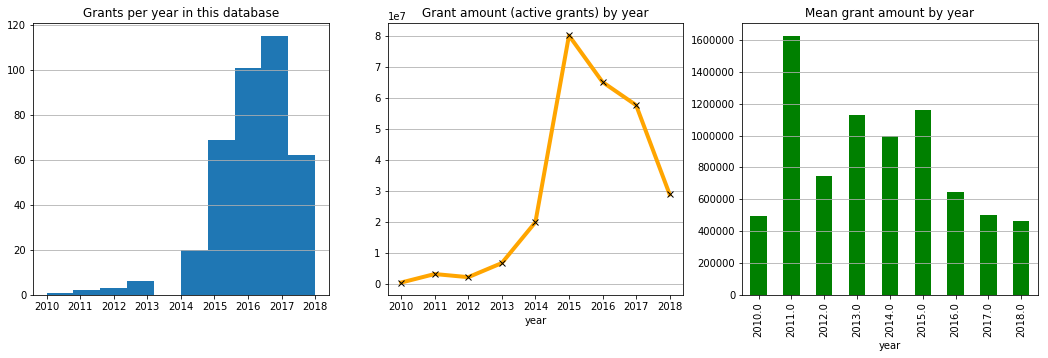

In [126]:
fig,(ax1, ax2, ax3) = plt.subplots(1,3,figsize=[18,5])

df['year'].hist(ax=ax1)
ax1.set(title='Grants per year in this database')
ax1.grid(axis='x')

df.groupby('year')['Grant Amount'].sum().plot(lw=4,color='orange',marker='x',markeredgecolor='black',ax=ax2)
ax2.set(title='Grant amount (active grants) by year')
ax2.grid(axis='y')

df.groupby('year')['Grant Amount'].mean().plot(kind='bar',color='g',ax=ax3)
ax3.set(title='Mean grant amount by year')
ax3.grid(axis='y')

Text(0.5,1,'Current portfolio by funding source')

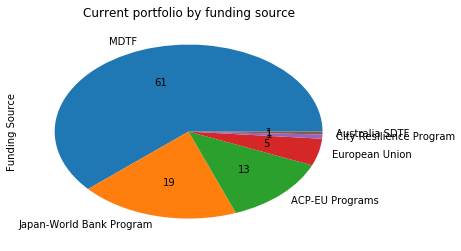

In [127]:
df['Funding Source'].value_counts().plot(kind='pie',autopct='%.0f')
plt.title('Current portfolio by funding source')

### 4. Example of how some lines of code can automate a data cleaning task
Let's say TTLs were meant to fill out a field with the number of beneficiaries. But many of them have added extraneous text as well.
Here we write a quick lines of code to extract the numbers only.
We package it as a function so we can re-run it on any cell or column whenever we wish.

In [128]:
# example of a cell that should have been entered as a numeric value only

messy_text = "the grant helped approximately 34000 people"
messy_text_2 = "so far, beneficiary total is 50000"

In [129]:
# example of writing a function to clean it up

def extract_beneficiary_numbers(data):             # this line defines a function, and specifies that one parameter ('data') will be passed to it
    words = data.split(" ")
    for word in words:
        if word.isdigit():
            return(word)

In [130]:
# run the function
extract_beneficiary_numbers(messy_text)

'34000'

#### Other uses:
* clean up more complicated data entry problems
* find patterns or anomalies from the other fields

### 4. Answer some more questions

#### 4.1 Which countries have the largest average grant?

In [131]:
print("Ten countries with largest average grant")
df.groupby('Country')['Grant Amount'].mean().sort_values(ascending=False).head(10)

Ten countries with largest average grant


Country
Mekong                          2500000
Africa                          1569735
Vanuatu                         1499963
Afghanistan                     1489323
India                           1390133
Tajikistan                      1250000
Congo, Democratic Republic of   1200000
Serbia                          1136789
Nepal                           1085770
Philippines                     1052294
Name: Grant Amount, dtype: float64

#### 4.2 Do some regions get more grants, or larger grants, than others?

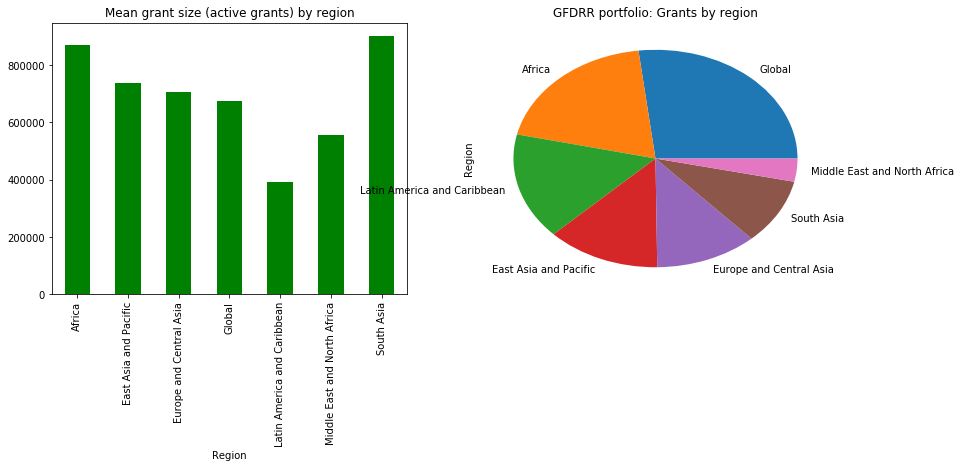

In [132]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=[14,5])

df.groupby('Region')['Grant Amount'].mean().plot(kind='bar',color='g',ax=ax1)
ax1.set(title='Mean grant size (active grants) by region')

df.Region.value_counts().plot(kind='pie',title='GFDRR portfolio: Grants by region',ax=ax2);

#### 4.3 Which TTLs have snagged the most GFDRR grants?

In [133]:
df.TTL.value_counts(ascending=False).head(10)

Prashant Singh                  11
Oscar Anil Ishizawa Escudero     9
Artessa Saldivar-Sali            9
Emma Katrine Phillips            7
Michael Bonte-Grapentin          7
Jolanta Kryspin-Watson           7
Federica Ranghieri               7
Kamran Akbar                     7
Ko Takeuchi                      7
Marc S. Forni                    6
Name: TTL, dtype: int64

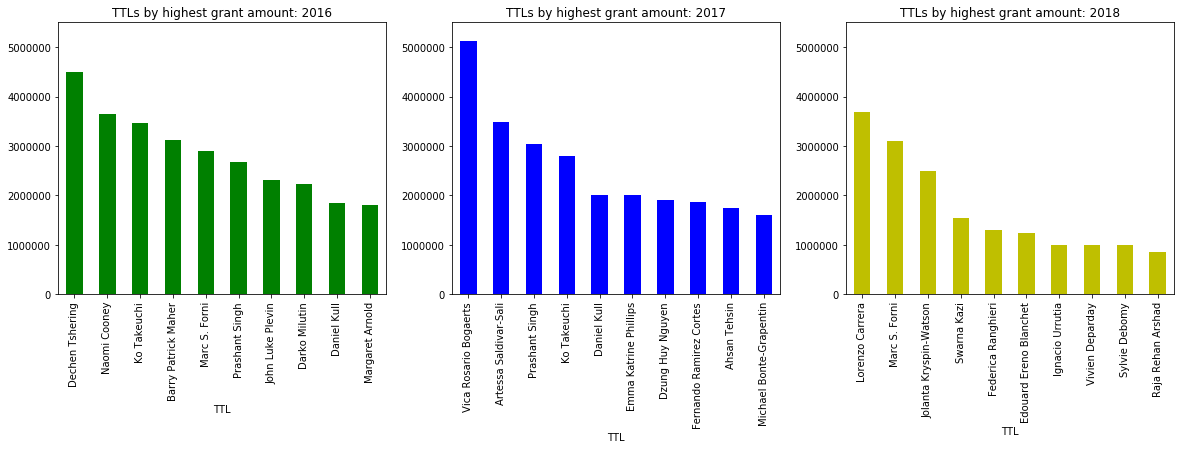

In [134]:
fig = plt.figure(figsize=[20,5])
colors = ['g','b','y']
for n, i in enumerate([2016,2017,2018]):
    fig.add_subplot(1,3,n+1)
    df[df.year == i].groupby(['TTL'])['Grant Amount'].sum().sort_values(
        ascending=False).head(10).plot(
        kind='bar',title="TTLs by highest grant amount: {}".format(i),ylim=[0,5500000],color=colors[n])

### 5. Maps and scatter plots to explore funding allocation

#### 5.1 Map of GFDRR grant amounts by country

In [ ]:
not_countries = ['Global','Africa','Pacific Islands','South Asia','Caribbean','Central Asia','Mekong','East Asia and Pacific'
                 'Central America','Western Balkans','West Bank & Gaza','Latin America','OECS Countries','Eastern Africa',
                'Middle East and North Africa','Europe and Central Asia','Central America','Southern Africa']

df_all = df[~df.Country.isin(not_countries)]
df_all = df_all[['Country','Grant Amount']].groupby('Country').sum()

In [139]:
borders = gpd.read_file('world_boundaries/ne_10m_admin_0_countries.shp')[['NAME_EN','POP_EST','geometry','SUBREGION']]
borders_Asia = borders[borders.SUBREGION.isin(['South-Eastern Asia','Southern Asia'])]

In [140]:
df_Asia = borders_Asia.merge(df_all,left_on="NAME_EN",right_on='Country',how='left')
df_Asia = gpd.GeoDataFrame(df_Asia,geometry='geometry',crs=borders.crs)

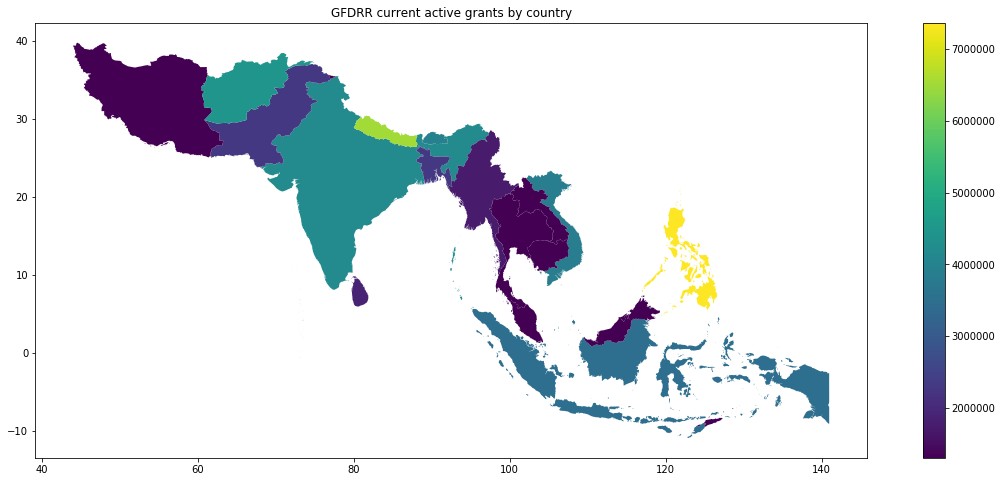

In [142]:
ax = df_Asia.plot(column='Grant Amount',figsize=[20,8],legend=True)
ax.set(title='GFDRR current active grants by country');

In [ ]:
# Quick cross-check to see how it adds up to US$ 7 million for Philippines based on the CSV

df[['Grant Title','Grant Amount','TTL']][df.Country == 'Philippines'].sort_values(by='Grant Amount',ascending=False).reset_index(drop=True)

In [ ]:
## yes --> the csv shows 7 million grants for Philippines

#### 5.2 Grant amounts *per capita*

In [143]:
df_Asia['grant_per_capita'] = df_Asia[df_Asia.NAME_EN != 'Bhutan']['Grant Amount'] / df_Asia[df_Asia.NAME_EN != 'Bhutan'].POP_EST

[Text(0.5,1,'GFDRR current active grants by country (US$ per capita)')]

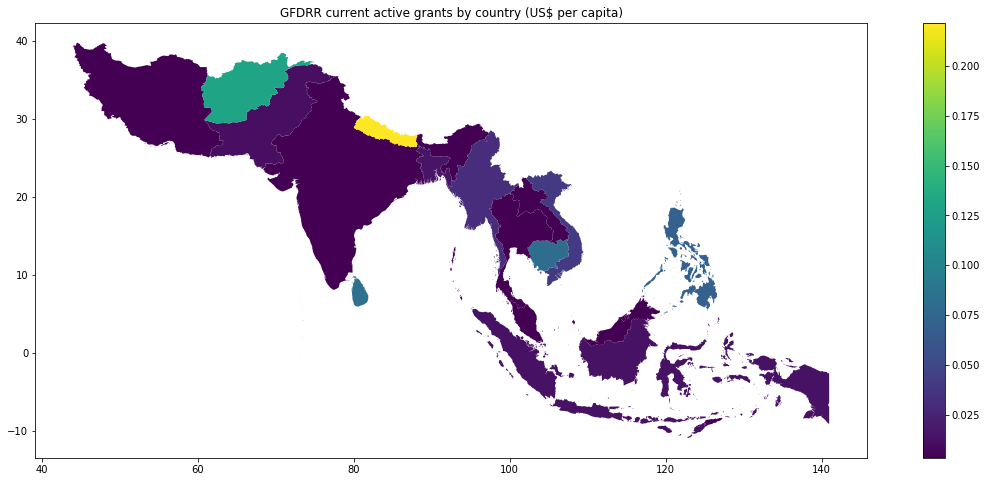

In [144]:
ax = df_Asia[df_Asia.NAME_EN != 'Bhutan'].plot(column='grant_per_capita',figsize=[20,8],legend=True)
ax.set(title='GFDRR current active grants by country (US$ per capita)')

#### 5.3 Does GFDRR give more funds to smaller countries

In [146]:
df_all = borders.merge(df_all,left_on="NAME_EN",right_on='Country',how='left')
df_all = gpd.GeoDataFrame(df_all,geometry='geometry',crs=borders.crs)

In [163]:
exclude_list = ['Tonga','Dominica','Tuvalu','Vanuatu','India','Bhutan','Indonesia','Solomon Islands','Antigua and Barbuda']

In [164]:
df_all['grant_per_capita'] = df_all[~df_all.NAME_EN.isin(exclude_list)]['Grant Amount'] / df_all[~df_all.NAME_EN.isin(exclude_list)].POP_EST

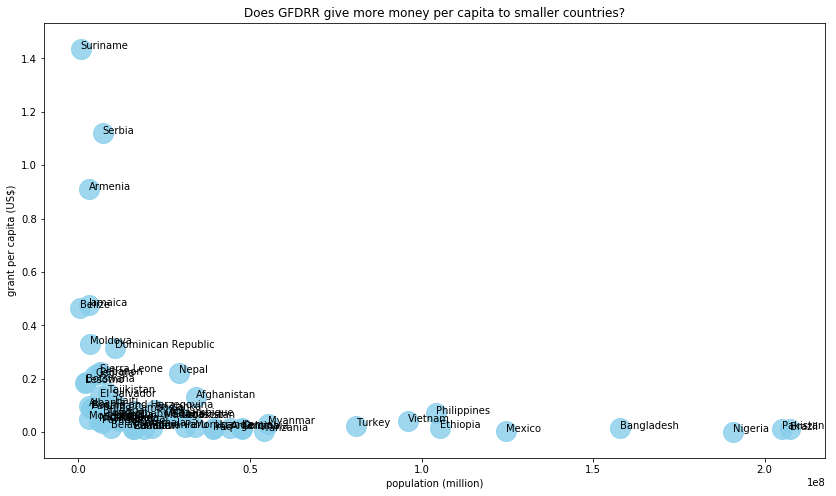

In [170]:
df = df_all[['POP_EST','grant_per_capita','NAME_EN']]
df.dropna(inplace=True)
df.columns = [['x','y','NAME_EN']]

fig,ax=plt.subplots(figsize=[14,8])
sns.regplot(data=df, x="x", y="y", fit_reg=False, marker="o", color="skyblue", scatter_kws={'s':400},ax=ax)
 
# add annotations one by one with a loop
for i in range(0,df.shape[0]):
    ax.text(df.x.iloc[i], df.y.iloc[i], df.NAME_EN.iloc[i].values[0])
    
ax.set(xlabel='population (million)',ylabel='grant per capita (US$)',title='Does GFDRR give more money per capita to smaller countries?');